# Projeto Python IA: Inteligência Artificial e Previsões

### Case: Score de Crédito dos Clientes

Você foi contratado por um banco para conseguir definir o score de crédito dos clientes. Você precisa analisar todos os clientes do banco e, com base nessa análise, criar um modelo que consiga ler as informações do cliente e dizer automaticamente o score de crédito dele: Ruim, Ok, Bom

Arquivos da aula: https://drive.google.com/drive/folders/1FbDqVq4XLvU85VBlVIMJ73p9oOu6u2-J?usp=drive_link

In [1]:
# Score de crédito do cliente
# Boa - Good
# Ok - Standard
# Ruim - Poor
# !pip install pandas scikit-learn

# Passo a Passo
# Passo 0: Entender o desafio e a empresa
# Passo 1: Importar a base de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tabela = pd.read_csv("clientes.csv")

display(tabela)


,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


In [2]:
# Passo 2: Preparar a base de dados para a Inteligência Artificial (IA)
display(tabela.info())

# int -> número inteiro
# float -> número com casa decimal
# object -> texto

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Profissão

# Cientista
# Mecânico
# Ator
# Pintor
# Motorista
# Engenheiro
# Pedreiro
# Maquinista
codificador_profissao = LabelEncoder()
tabela["profissao"] = codificador_profissao.fit_transform(tabela["profissao"])

# mix_credito
codificador_credito = LabelEncoder()
tabela["mix_credito"] = codificador_credito.fit_transform(tabela["mix_credito"])

# comportamento_pagamento
codificador_pagamento = LabelEncoder()
tabela["comportamento_pagamento"] = codificador_pagamento.fit_transform(tabela["comportamento_pagamento"])

# criando a variável codificador
codificador_score = LabelEncoder()
tabela["score_credito"] = codificador_score.fit_transform(tabela["score_credito"])

display(tabela.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int64  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int64  
 13  divida_total              100000 non-null  fl

None

In [3]:
# Separar as informações da base de dados para a inteligência artificial

# Separar em X e Y
# Y -> Quem eu quero prever (coluna score_credito)
y = tabela["score_credito"]
# X -> As outras colunas (todas as colunas que eu vou usar para fazer a previsão)
x = tabela.drop(columns=["score_credito", "id_cliente"])

# Separar em dados de treino e de teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)


In [4]:
# Passo 3: Criar o modelo de IA -> prever a nota de crédito

# Árvore de Decisão -> RandomForest
# Vizinhos Próximos -> KNN

# Importar o modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Criar o modelo
modelo_arvoredecisao = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()

# Treinar o modelo
modelo_arvoredecisao.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)


KNeighborsClassifier()

In [5]:
# Passo 4: Escolher o melhor modelo

# Previsões
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste)

# Acurácia
from sklearn.metrics import accuracy_score

display(accuracy_score(y_teste, previsao_arvoredecisao))
display(accuracy_score(y_teste, previsao_knn))


0.8269333333333333

0.7399666666666667

In [6]:
# Passo 5: Fazer novas previsões
# O melhor modelo é o de árvore de decisão

# Carregar novos clientes
tabela_novos_clientes = pd.read_csv("novos_clientes.csv")

# Aplicar os mesmos codificadores usados no treino
tabela_novos_clientes["profissao"] = codificador_profissao.transform(tabela_novos_clientes["profissao"])
tabela_novos_clientes["mix_credito"] = codificador_credito.transform(tabela_novos_clientes["mix_credito"])
tabela_novos_clientes["comportamento_pagamento"] = codificador_pagamento.transform(tabela_novos_clientes["comportamento_pagamento"])

# Fazer a previsão com o modelo de árvore de decisão
previsoes = modelo_arvoredecisao.predict(tabela_novos_clientes)


In [7]:
# Passo 6: Criar o DataFrame e traduzir os números para nomes
# (Certifique-se que a variável 'previsao' foi gerada no passo anterior)
df_final = pd.DataFrame(previsoes, columns=['Score'])

# Traduzindo 0, 1, 2 de volta para Good, Standard, Poor
df_final['Score'] = codificador_score.inverse_transform(df_final['Score'])


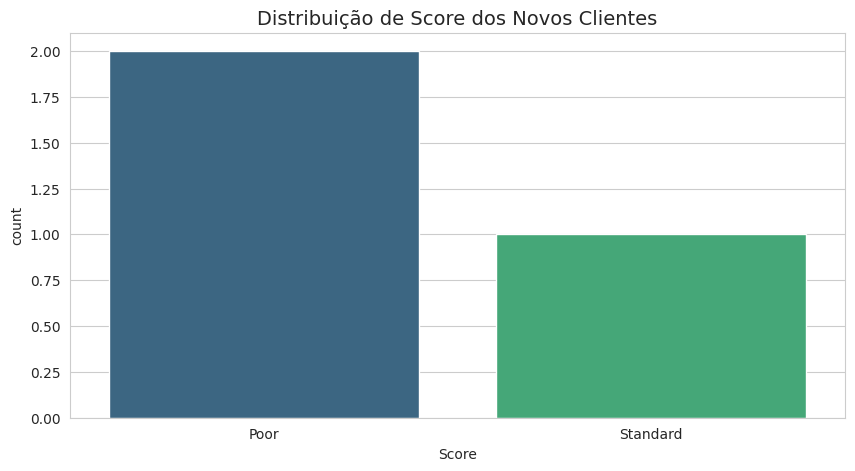

--- ANÁLISE DAS PREVISÕES ---
O modelo analisou um total de 3 novos clientes.
A categoria predominante foi: Poor com 2 clientes.
Cerca de 0.0% da nova base foi classificada como 'Good' (Bom Score).

Conclusão: Este resultado permite ao banco decidir quais clientes receberão
ofertas de crédito imediato ou precisarão de uma análise manual mais rigorosa.


In [8]:
# Passo 7: Gráfico e Texto Explicativo
# Gerar o gráfico
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
grafico = sns.countplot(data=df_final, x='Score', palette='viridis', hue='Score', legend=False)
plt.title('Distribuição de Score dos Novos Clientes', fontsize=14)
plt.show()

# --- Texto Explicativo ---
total_clientes = len(df_final)
contagem = df_final['Score'].value_counts()
percentual_bom = (contagem.get('Good', 0) / total_clientes) * 100

print(f"--- ANÁLISE DAS PREVISÕES ---")
print(f"O modelo analisou um total de {total_clientes} novos clientes.")
print(f"A categoria predominante foi: {contagem.idxmax()} com {contagem.max()} clientes.")
print(f"Cerca de {percentual_bom:.1f}% da nova base foi classificada como 'Good' (Bom Score).")
print("\nConclusão: Este resultado permite ao banco decidir quais clientes receberão")
print("ofertas de crédito imediato ou precisarão de uma análise manual mais rigorosa.")
